<a href="https://colab.research.google.com/github/nicktho16/CS420Assignments/blob/main/FrozenLake_RL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt

In [ ]:

# Initialize FrozenLake environment
env = gym.make("FrozenLake-v1", desc=None, map_name="4x4", is_slippery=True, render_mode=None)
n_actions = env.action_space.n
n_states = env.observation_space.n


In [ ]:
def print_frozen_lake_layout(env):
    desc = env.unwrapped.desc.astype(str)
    size = desc.shape[0]

    for i in range(size):
        row = ""
        for j in range(size):
            cell = f" {desc[i][j]} "
            row += f"|{cell}"
        row += "|"
        print(row)
        print("-" * len(row))
print_frozen_lake_layout(env)

| S | F | F | F |
-----------------
| F | H | F | H |
-----------------
| F | F | F | H |
-----------------
| H | F | F | G |
-----------------


In [ ]:
alpha = 0.1
gamma = 0.95
epsilon = 1.0
epsilon_decay = 0.9995
epsilon_min = 0.05
num_episodes = 10000


In [ ]:
# Initialize Q-table
Q = np.zeros((n_states, n_actions))

# Store rewards per episode
rewards_per_episode_Q = []

# Q-learning loop
for episode in range(num_episodes):
    state, _ = env.reset()
    total_reward = 0
    done = False

    while not done:
        # Choose action using epsilon-greedy policy
        if np.random.rand() < epsilon:
            action = env.action_space.sample()  # Explore
        else:
            action = np.argmax(Q[state, :])  # Exploit

        next_state, reward, done, truncated, _ = env.step(action)

        # Update Q-value
        Q[state, action] = (1 - alpha) * Q[state, action] + alpha * (reward + gamma * np.max(Q[next_state, :]))

        state = next_state
        total_reward += reward

    # Decay epsilon
    epsilon = max(epsilon_min, epsilon * epsilon_decay)
    rewards_per_episode_Q.append(total_reward)

    if (episode + 1) % 500 == 0:
        print(f"Episode {episode + 1}/{num_episodes}, Epsilon: {epsilon:.4f}, Avg Reward: {np.mean(rewards_per_episode_Q[-100:]):.2f}")


Episode 500/10000, Epsilon: 0.7788, Avg Reward: 0.02
Episode 1000/10000, Epsilon: 0.6065, Avg Reward: 0.04
Episode 1500/10000, Epsilon: 0.4723, Avg Reward: 0.05
Episode 2000/10000, Epsilon: 0.3678, Avg Reward: 0.08
Episode 2500/10000, Epsilon: 0.2864, Avg Reward: 0.13
Episode 3000/10000, Epsilon: 0.2230, Avg Reward: 0.16
Episode 3500/10000, Epsilon: 0.1737, Avg Reward: 0.41
Episode 4000/10000, Epsilon: 0.1353, Avg Reward: 0.40
Episode 4500/10000, Epsilon: 0.1053, Avg Reward: 0.26
Episode 5000/10000, Epsilon: 0.0820, Avg Reward: 0.46
Episode 5500/10000, Epsilon: 0.0639, Avg Reward: 0.51
Episode 6000/10000, Epsilon: 0.0500, Avg Reward: 0.51
Episode 6500/10000, Epsilon: 0.0500, Avg Reward: 0.29
Episode 7000/10000, Epsilon: 0.0500, Avg Reward: 0.48
Episode 7500/10000, Epsilon: 0.0500, Avg Reward: 0.44
Episode 8000/10000, Epsilon: 0.0500, Avg Reward: 0.53
Episode 8500/10000, Epsilon: 0.0500, Avg Reward: 0.41
Episode 9000/10000, Epsilon: 0.0500, Avg Reward: 0.47
Episode 9500/10000, Epsilon: 

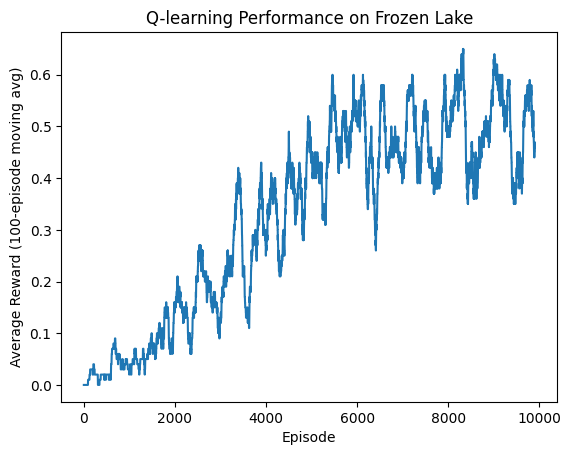

Learned Q-table:
[[0.20723313 0.1618406  0.16331294 0.16295708]
 [0.0908955  0.0848774  0.07364385 0.14925607]
 [0.13717272 0.10691451 0.10823151 0.10605231]
 [0.08958018 0.07479608 0.06944829 0.09593588]
 [0.24302801 0.14416089 0.13282385 0.10826387]
 [0.         0.         0.         0.        ]
 [0.15475099 0.06689209 0.09277409 0.0572576 ]
 [0.         0.         0.         0.        ]
 [0.16231846 0.23435821 0.15993199 0.30367794]
 [0.25726613 0.37701737 0.30236317 0.25613382]
 [0.43969728 0.28203445 0.21037513 0.21482582]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.33023615 0.34479928 0.42625313 0.27152771]
 [0.54425646 0.66931029 0.5670249  0.5213447 ]
 [0.         0.         0.         0.        ]]



Optimal state values from Value Iteration:
[0.18046404 0.15475089 0.15347326 0.13254421 0.20896091 0.
 0.17642894 0.         0.27045289 0.37464883 0.40367096 0.
 0.         0.50897814 0.72367275 0.        ]
State | Max Q-Value 

In [ ]:
# Plot learning curve
plt.plot(np.convolve(rewards_per_episode_Q, np.ones(100)/100, mode='valid'))
plt.xlabel("Episode")
plt.ylabel("Average Reward (100-episode moving avg)")
plt.title("Q-learning Performance on Frozen Lake")
plt.show()

# Display learned Q-table
print("Learned Q-table:")
print(Q)

# Value Iteration to find optimal utilities
V = np.zeros(n_states)
threshold = 1e-6
delta = float("inf")
env_unwrapped = env.unwrapped  # Get the raw environment

while delta > threshold:
    delta = 0
    for state in range(n_states):
        v = V[state]
        V[state] = max(sum(prob * (reward + gamma * V[next_state])
                          for prob, next_state, reward, _ in env_unwrapped.P[state][action])
                       for action in range(n_actions))
        delta = max(delta, abs(v - V[state]))

# Display optimal utility values
print("\n\n\nOptimal state values from Value Iteration:")
print(V)

# Compare max Q-values to optimal state values
print("State | Max Q-Value | Optimal V-Value | Difference")
print("---------------------------------------------------")
for state in range(n_states):
    max_q = np.max(Q[state, :])
    optimal_v = V[state]
    diff = abs(max_q - optimal_v)
    print(f"{state:5} | {max_q:10.4f} | {optimal_v:10.4f} | {diff:10.4f}")


In [ ]:
# Extract  policy from Q-table
policy_Q = np.argmax(Q, axis=1)

# Convert to grid shape for FrozenLake (4×4)
policy_grid = policy_Q.reshape(env.unwrapped.desc.shape)

# Map action indices to arrow symbols for readability
action_map = {0: '←', 1: '↓', 2: '→', 3: '↑'}
policy_symbols = np.vectorize(action_map.get)(policy_grid)

print("Extracted Q-Learning Policy (←, ↓, →, ↑):")
for row in policy_symbols:
    print(' '.join(row))

print(f"policy_Q: {policy_Q}")

Extracted Q-Learning Policy (←, ↓, →, ↑):
← ↑ ← ↑
← ← ← ←
↑ ↓ ← ←
← → ↓ ←
policy_Q: [0 3 0 3 0 0 0 0 3 1 0 0 0 2 1 0]



Average reward per episode using the optimal policy: 0.7726
Average number of steps per episode: 43.46


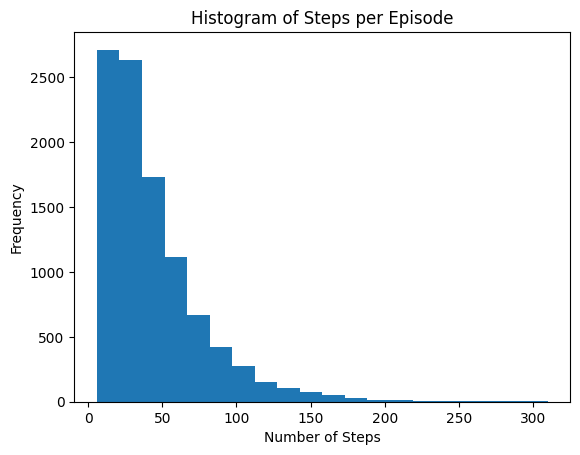

In [ ]:
# Simulate average reward per episode using the optimal policy
# In the simulation of average reward, keep track of the number of steps per episode, and make a histogram of the number of steps.

num_simulations = 10000
total_rewards = []
steps_per_episode = []  # Keep track of steps per episode

for _ in range(num_simulations):
    state, _ = env.reset()
    total_reward = 0
    done = False
    steps = 0

    while not done:
        action = policy_Q[state]  # Use the extracted policy
        next_state, reward, done, truncated, _ = env.step(action)
        state = next_state
        total_reward += reward
        steps += 1

    total_rewards.append(total_reward)
    steps_per_episode.append(steps)

average_reward = np.mean(total_rewards)
average_steps = np.mean(steps_per_episode)  # Calculate average steps
print(f"\nAverage reward per episode using the optimal policy: {average_reward:.4f}")
print(f"Average number of steps per episode: {average_steps:.2f}")

# Histogram of number of steps per episode
plt.hist(steps_per_episode, bins=20)
plt.xlabel("Number of Steps")
plt.ylabel("Frequency")
plt.title("Histogram of Steps per Episode")
plt.show()
